# Chapter 4: Non-Stationary Examples

In this chapter, we are going to go through some stationary data generation examples.  
A. Random Walk  
B. Drift w/ Unit Gaussian Noise  
C. Lorenz Attractor

## A. Random Walk
Scenario:  
Y(t+1) = Y(t) + N(0, 1) [standard normal]

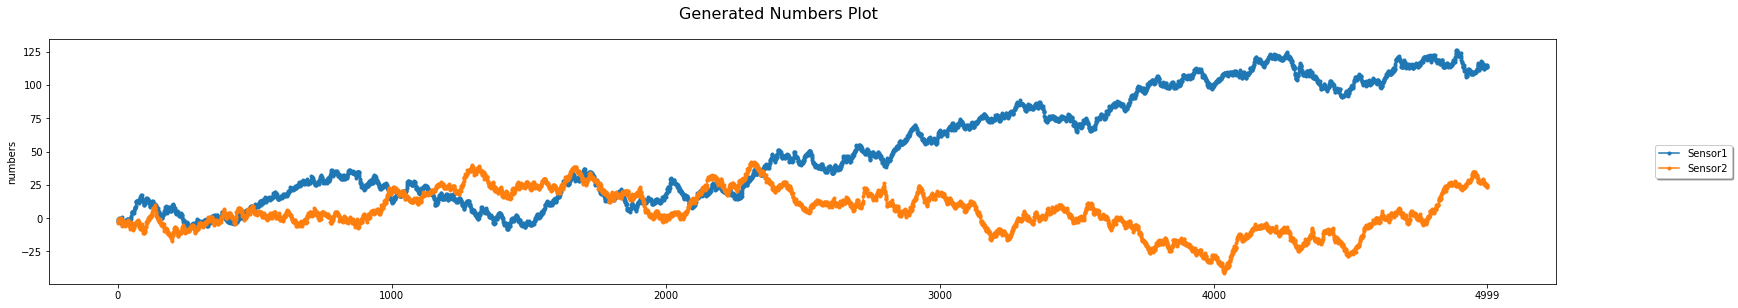

In [1]:
%matplotlib inline
import numpy as np

from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

dg.seed(seed)

# random walk 1
dg.generation_input.add_option(sensor_names="Sensor1",
                               eq="x",
                               initial={"x":0},
                               step={"x":np.random.randn(sample_size).cumsum()})

# random walk 2
dg.generation_input.add_option(sensor_names="Sensor2",
                               eq="x",
                               initial={"x":20},
                               step={"x":np.random.randn(sample_size).cumsum()})

# generation
dg.generate(sample_size, seed=seed)
dg.plot_data()

## B. Drift w/ Unit Gaussian Noise
Scenario:  
Drift can be anything,  
but here we want to make an exponentially increasing data points w/ some interval,  
which allows the data to be reset to near-stable state and increases by the drift interval.

Generated Data: Baseline


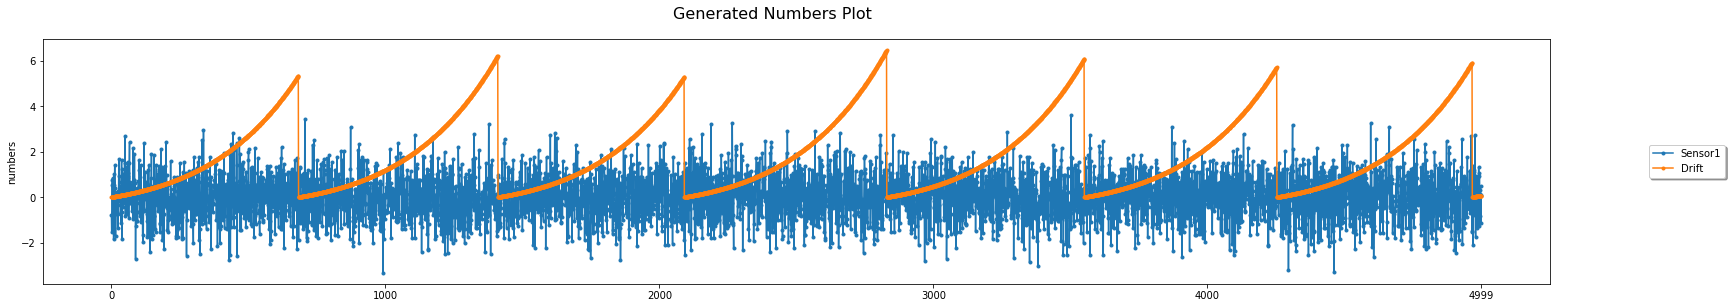

Generated Data: Result


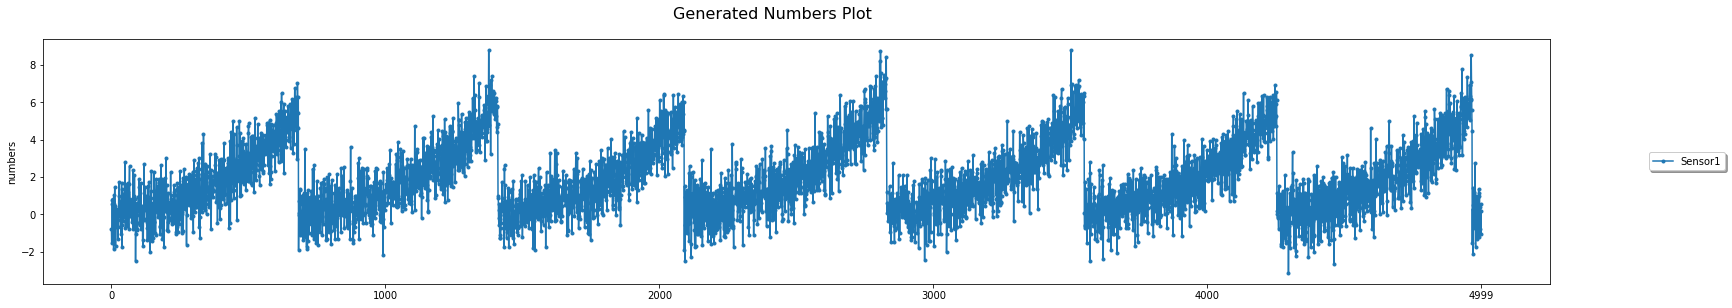

In [2]:
import numpy as np

from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

# drift reset index by poisson distribution
dg.seed(seed)
to_with_interval = np.append(np.random.poisson(700, 7).cumsum(), [sample_size])

# unit gaussian noise
dg.generation_input.add_option(sensor_names="Sensor1",distribution="normal", mu=0, sigma=1)

# drift
frm=0
for to_idx in to_with_interval:
    dg.generation_input.add_option(sensor_names="Drift",
                                   eq="x*exp(x)",
                                   initial={"x":0},
                                   step={"x":0.002},
                                   frm=frm,
                                   to=to_idx)
    frm=to_idx
    
# generation
print("Generated Data: Baseline")
dg.generate(sample_size, seed=seed)
dg.plot_data()

# modification
print("Generated Data: Result")
dg.sum(sensors=["Sensor1", "Drift"])
dg.drop_sensors(sensors=["Drift"])
dg.plot_data()

## C. Lorenz Attractor
Scenario:  
We want to simulate Lorenz Attractor, which can generate non-linear data points.  
In this part, we are going to go through the following scenarios:
1. Generate 3-dimension data through Lorenz Attractor, and expand it to 10-dimension data.
  - We simply multiply a 3 x p random matrix to the original Lorenz Attractor data to expand p-dimention data.
  - This process is automatically done by the generator.
2. Generate anomaly data
  - By making the latter 20% part of the 3rd column of the original 3-dimension Lorenz Attractor data placed in reverse order and expand it to 25-dimention data.
  - This process is also automatically done by the generator.

### C-1: Original Lorenz Attractor Data and Expansion

#### C-1-a: Original 3-dimension Lorenz Attractor Data

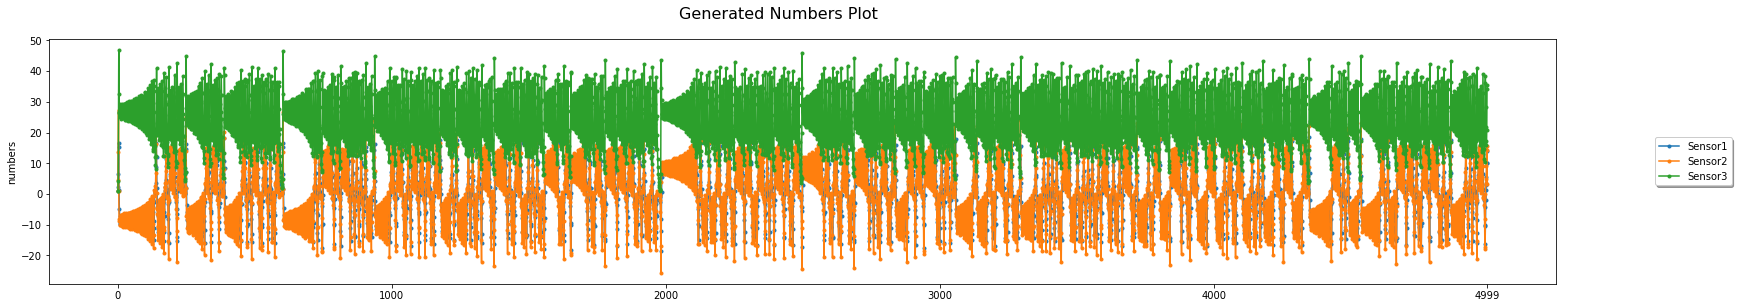

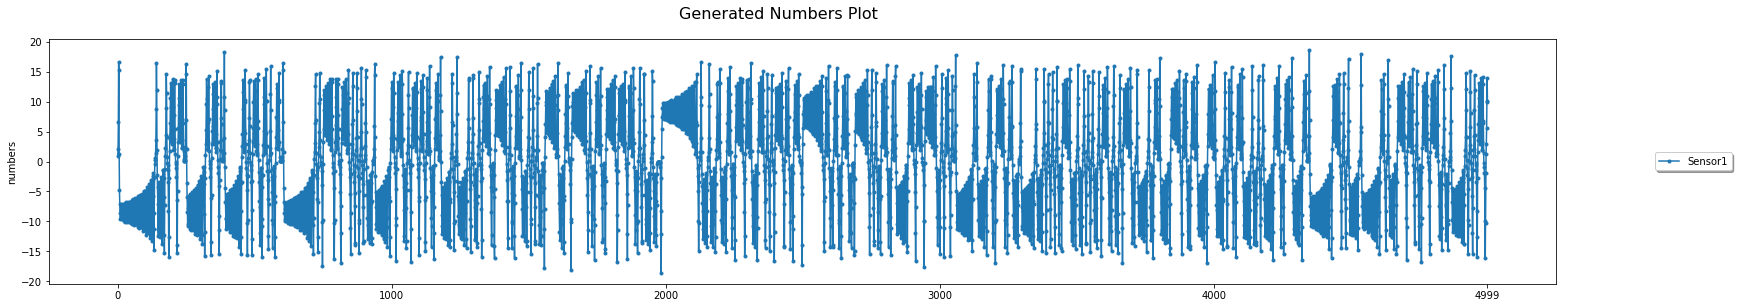

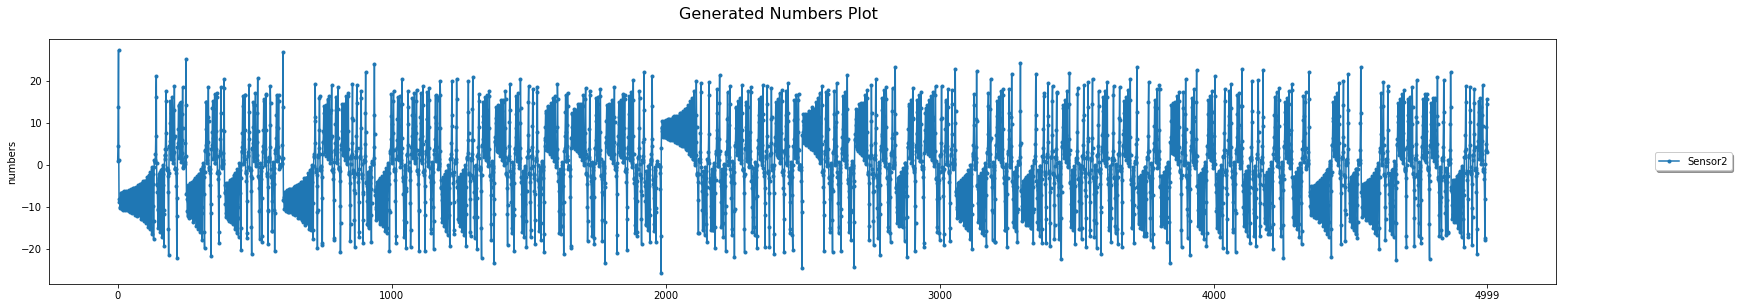

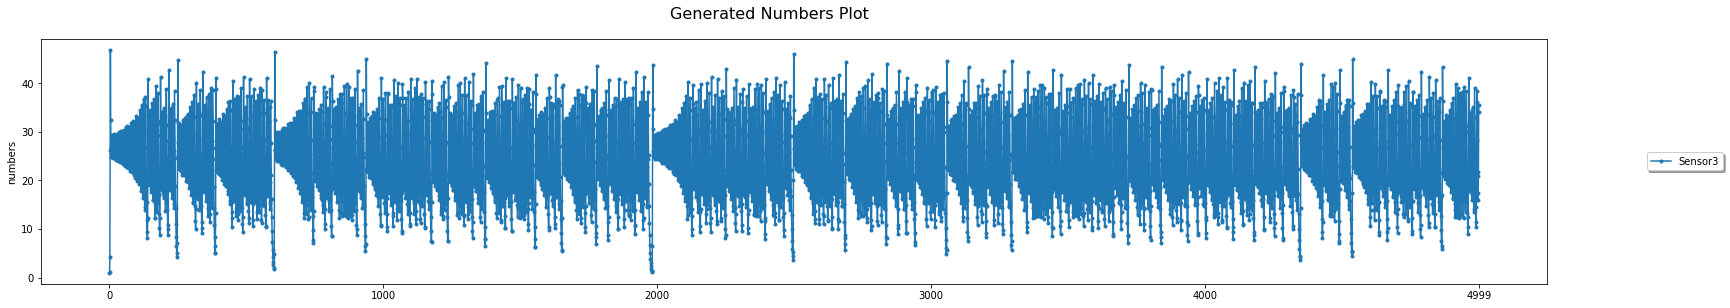

In [3]:
from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

# Lorenz Attractor
snames = ""
n_features = 3
for i in range(1, n_features+1):
    snames += " Sensor"+str(i)
dg.generation_input.add_option(sensor_names=snames,
                               attractor="lorenz",
                               rho = 28.0,
                               sigma = 10.0,
                               beta = 8.0/3.0,
                               initial = [1.0, 1.0, 1.0])

# generation
dg.generate(sample_size, seed=seed)

# plot all Sensors
dg.plot_data()
# plot by Sensor
for i in range(1, n_features+1):
    dg.plot_data(sensors=["Sensor"+str(i)])

#### C-1-b: Expansion to 10-dimension Data

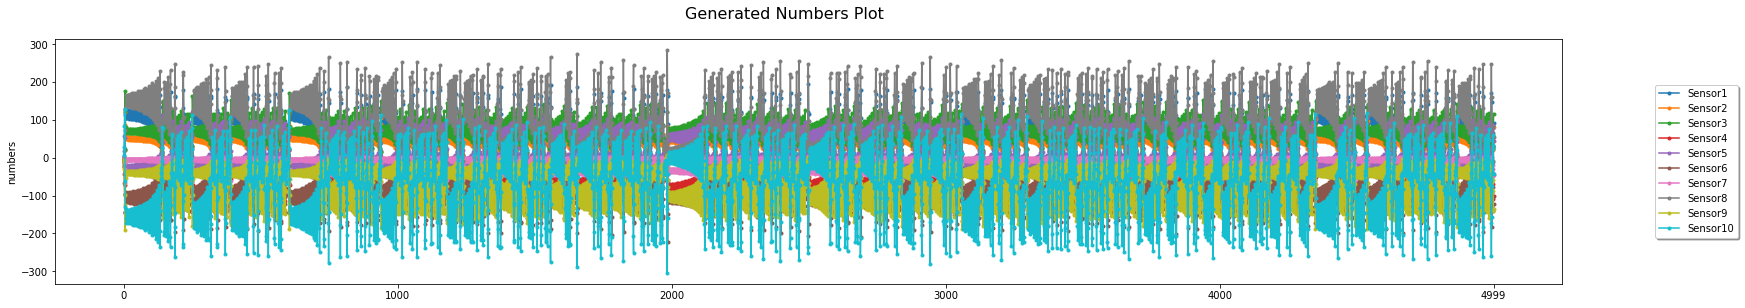

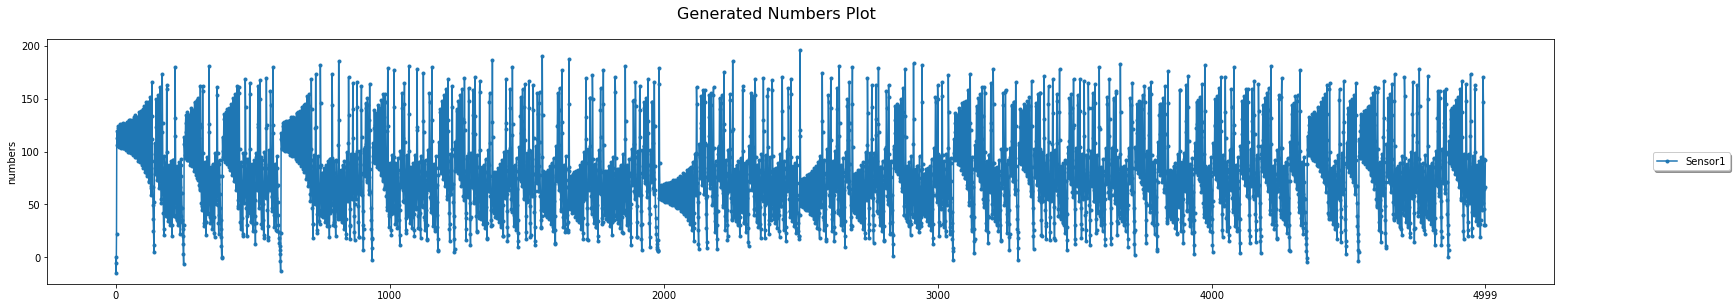

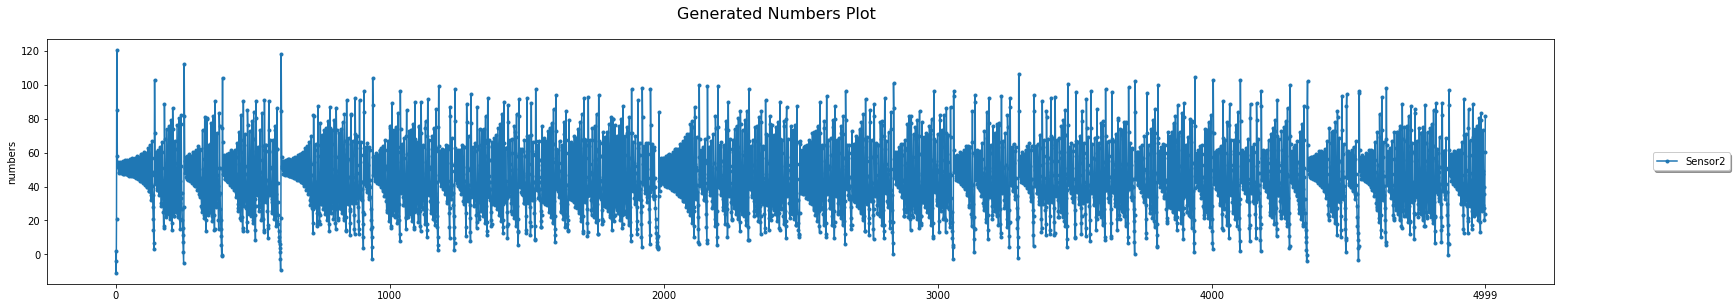

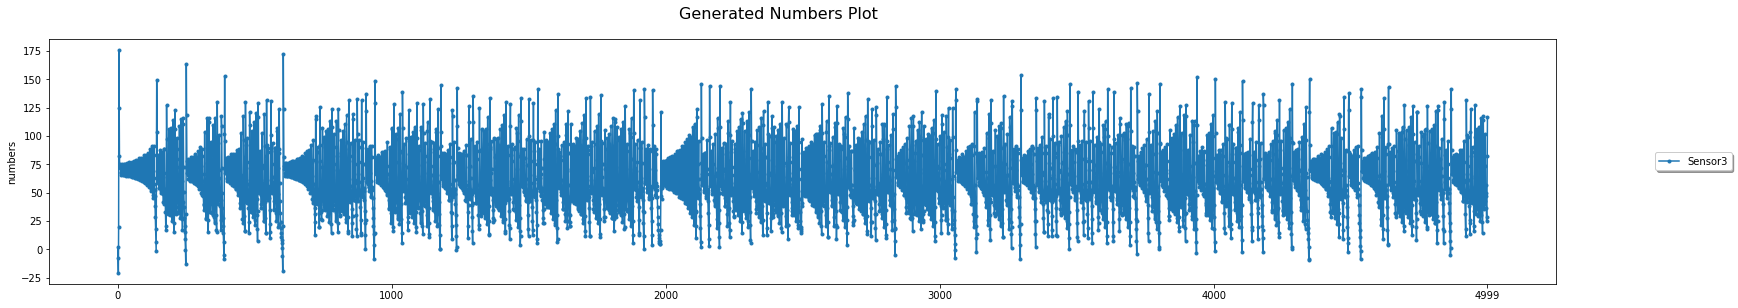

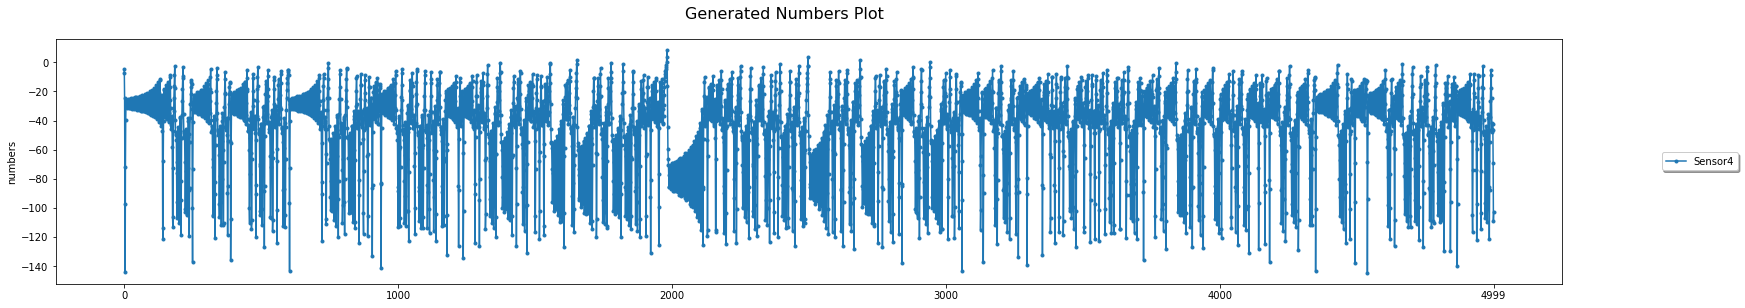

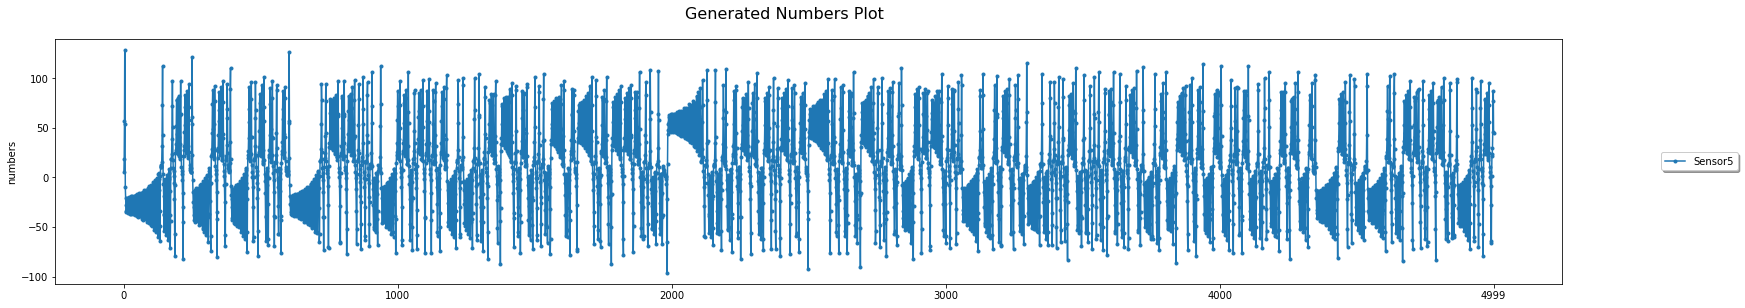

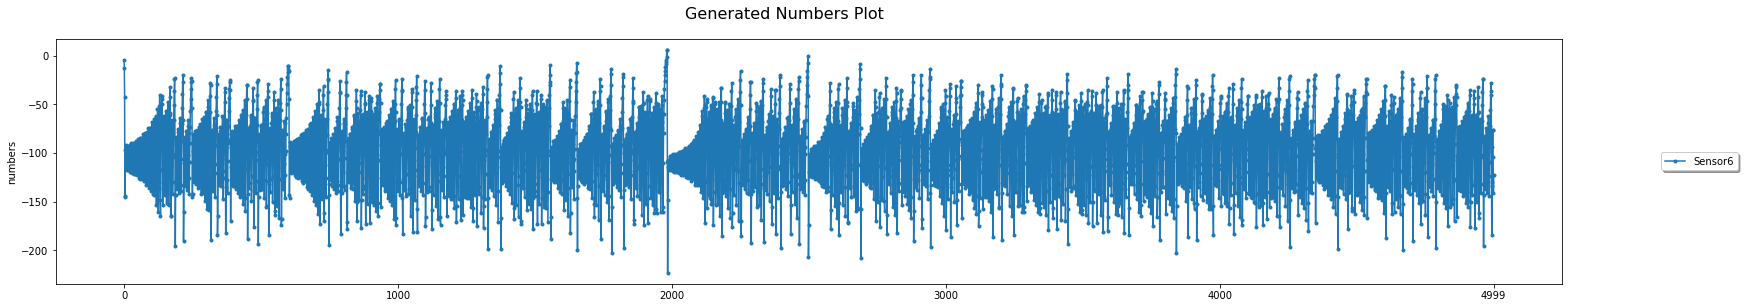

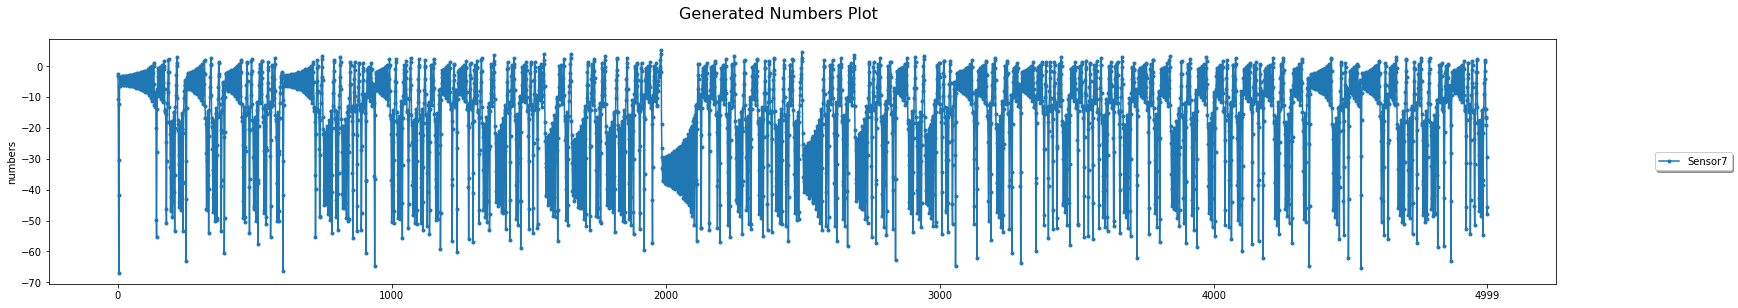

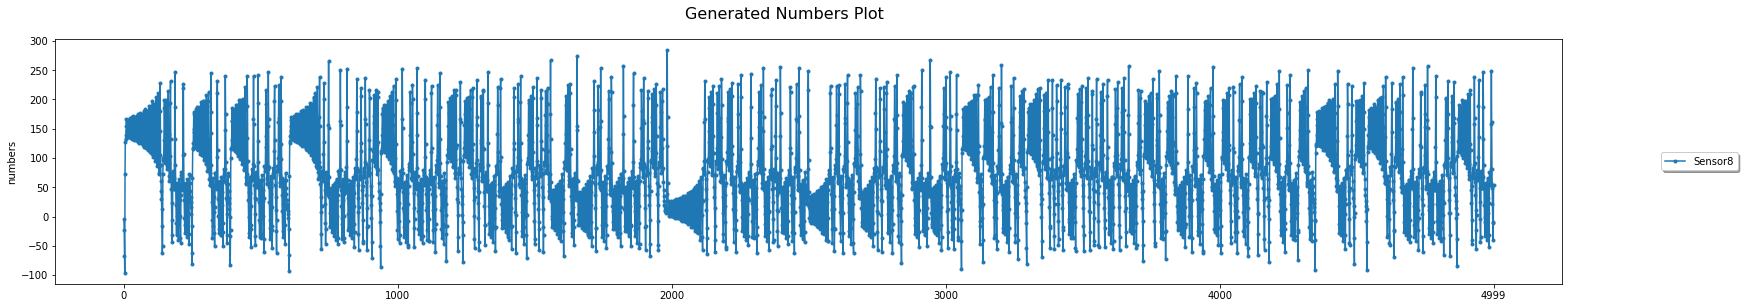

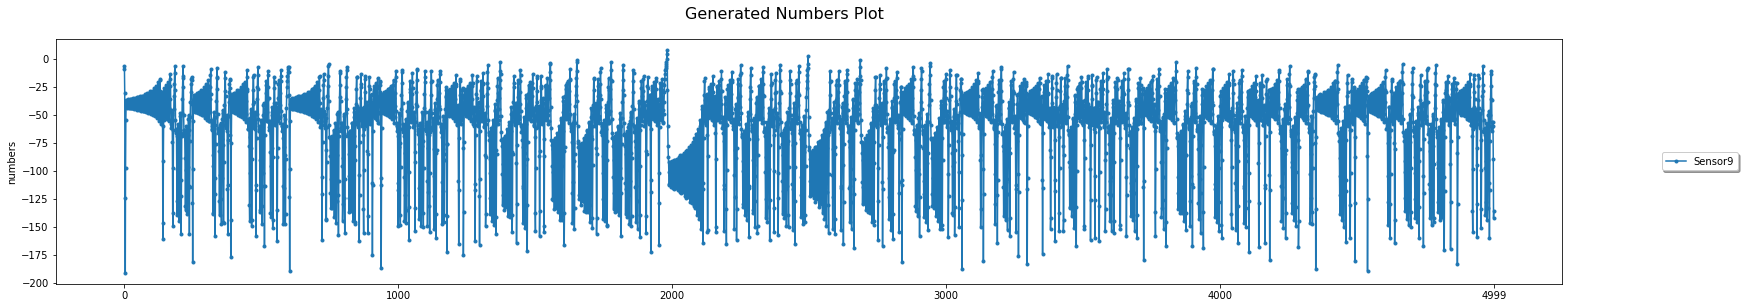

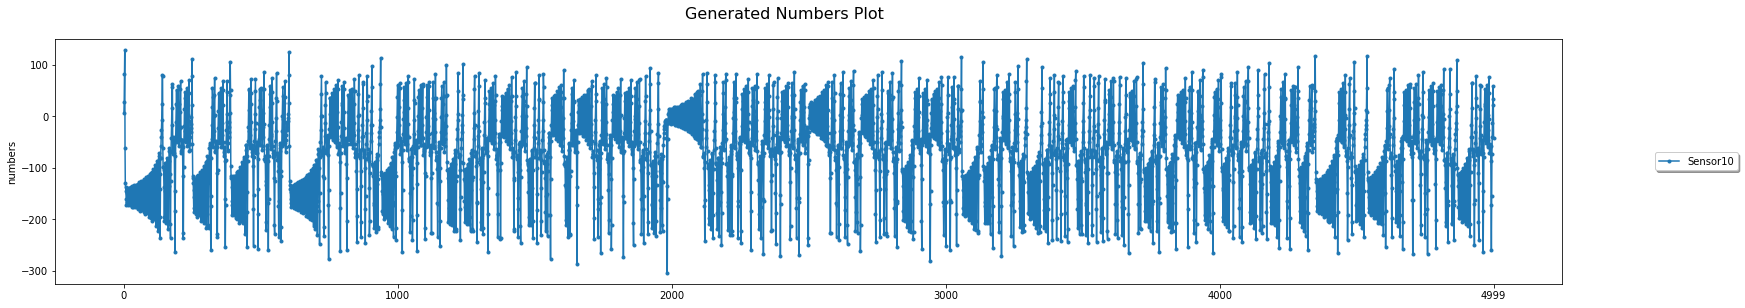

In [4]:
from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

# Expanded Lorenz Attractor
snames = ""
n_features = 10
for i in range(1, n_features+1):
    snames += " Sensor"+str(i)
dg.generation_input.add_option(sensor_names=snames,
                               attractor="lorenz",
                               rho = 28.0,
                               sigma = 10.0,
                               beta = 8.0/3.0,
                               initial = [1.0, 1.0, 1.0],
                               features=n_features)
    
# generation
dg.generate(sample_size, seed=seed)

# plot all Sensors
dg.plot_data()
# plot by Sensor
for i in range(1, n_features+1):
    dg.plot_data(sensors=["Sensor"+str(i)])

### C-2: Anomaly Creation and Expansion

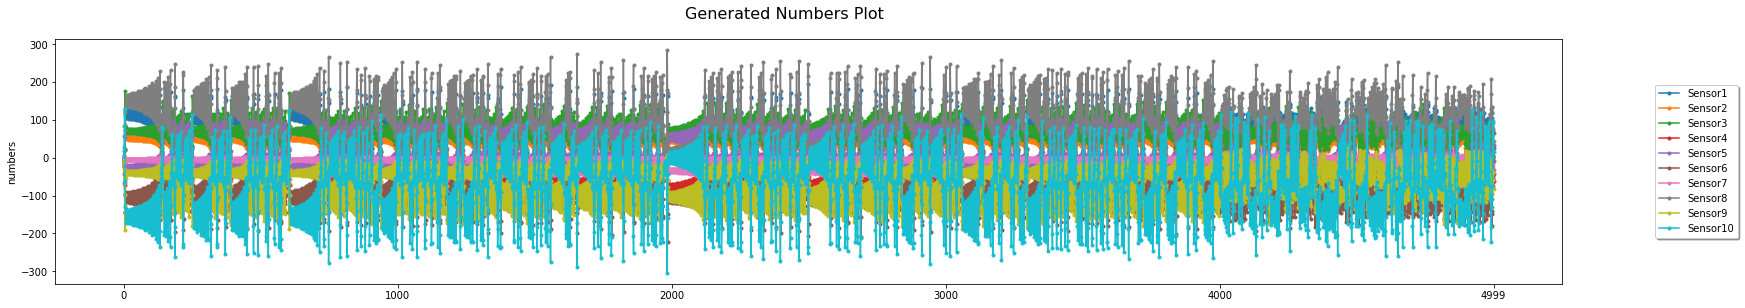

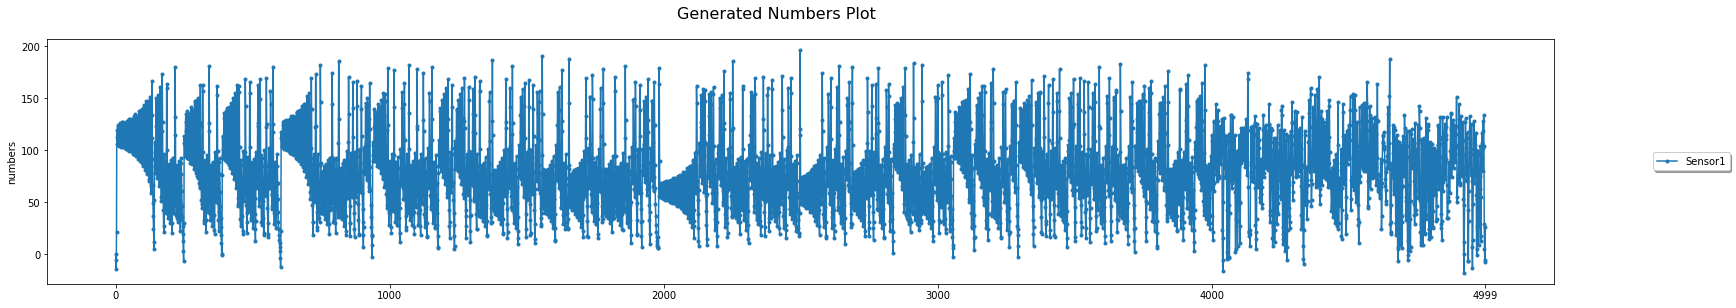

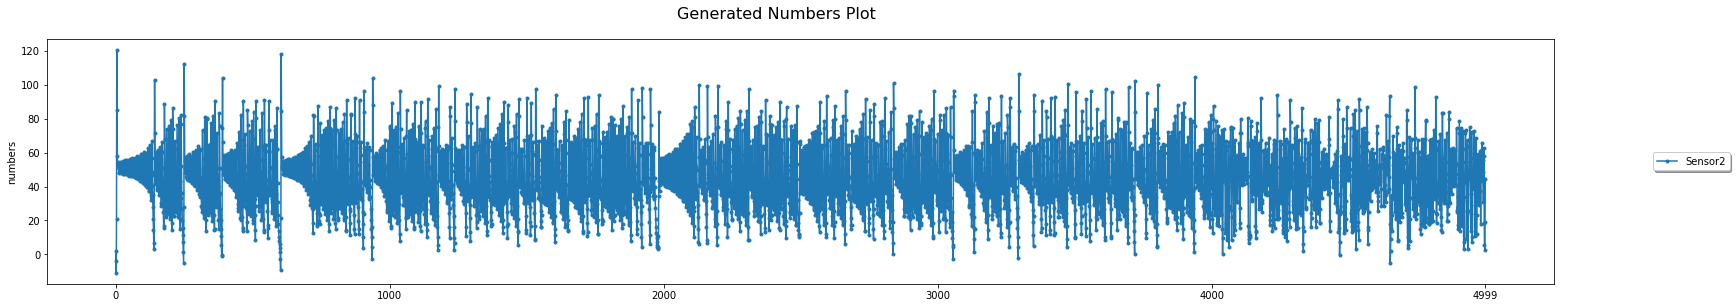

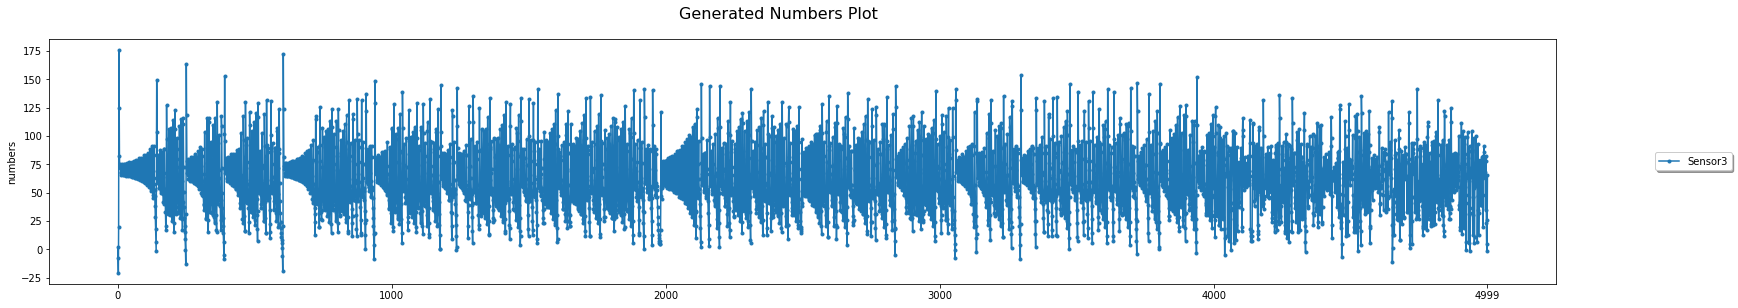

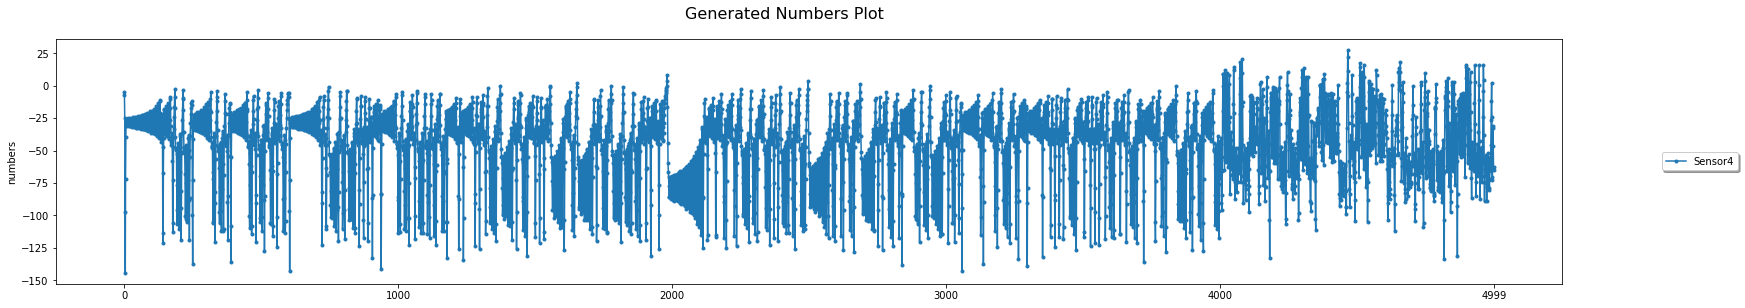

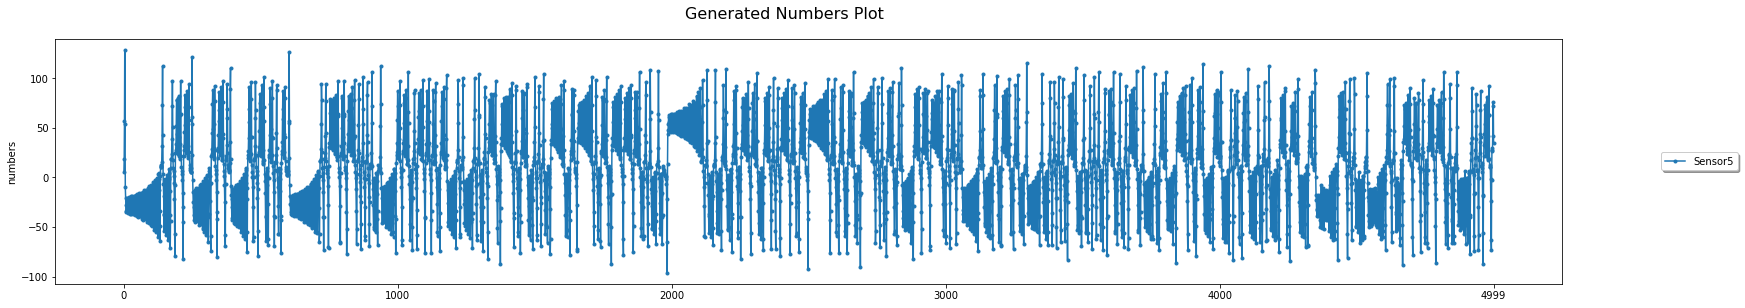

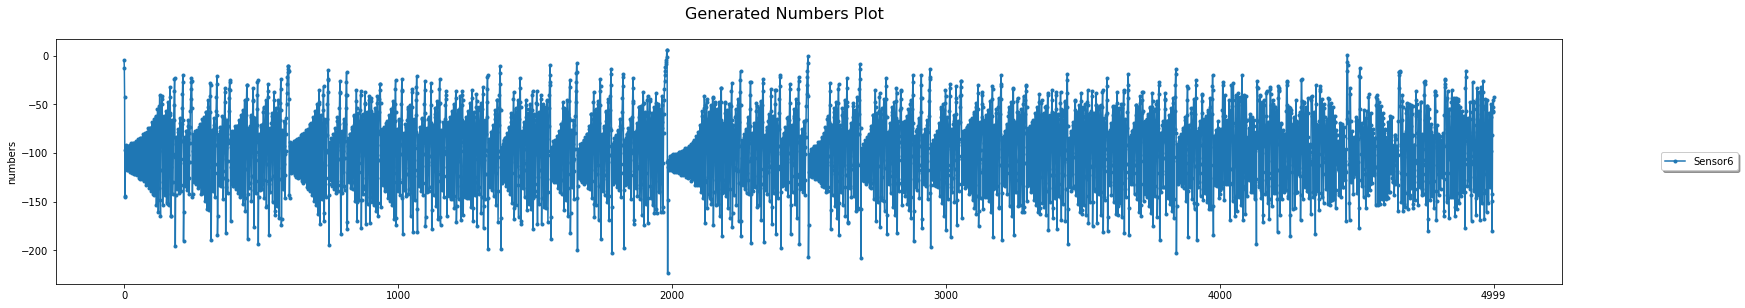

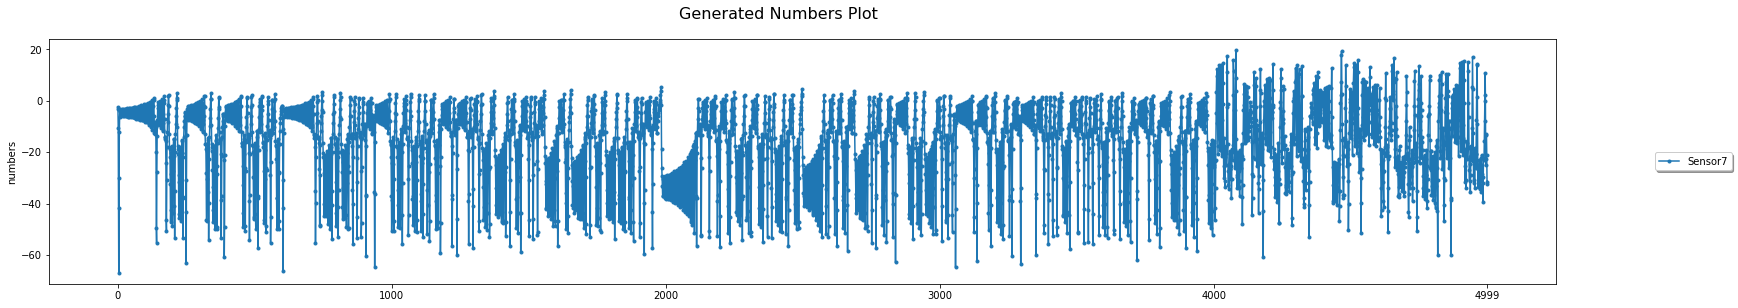

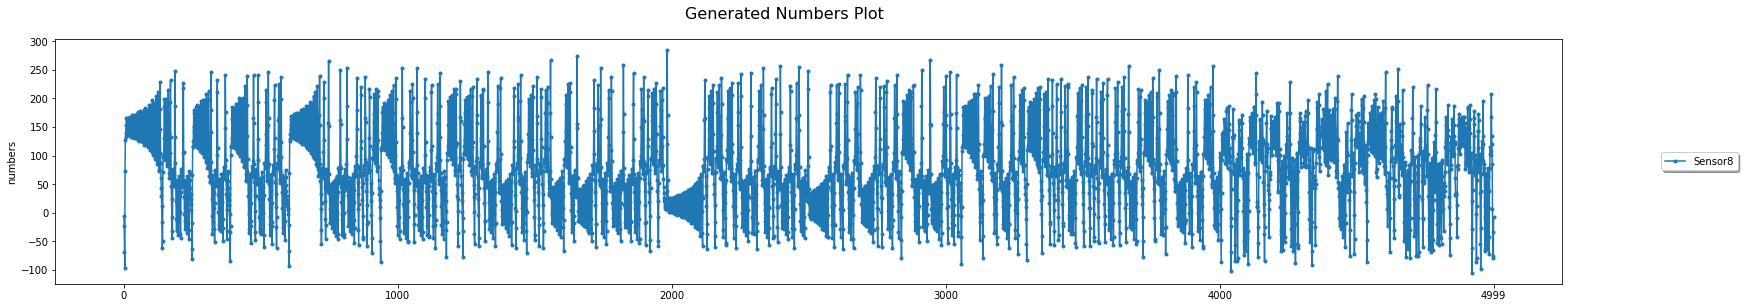

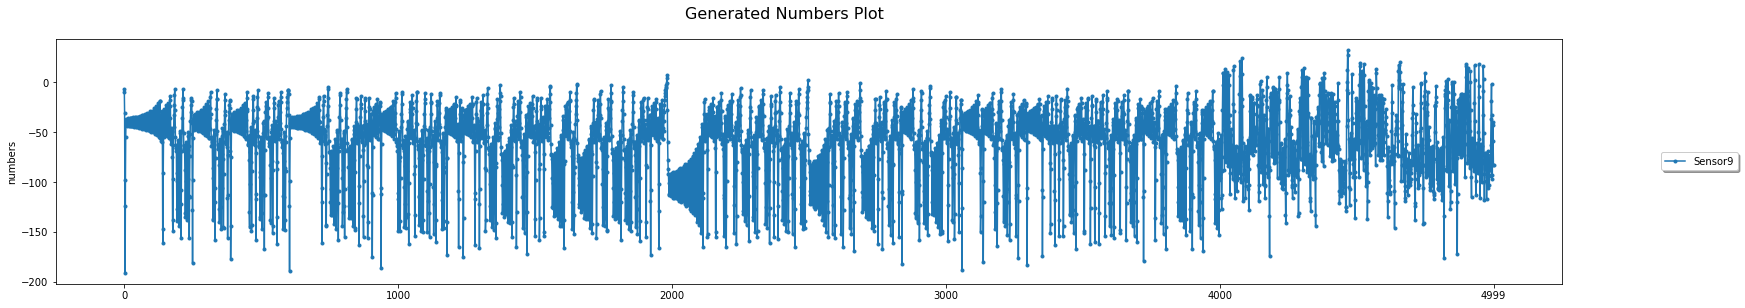

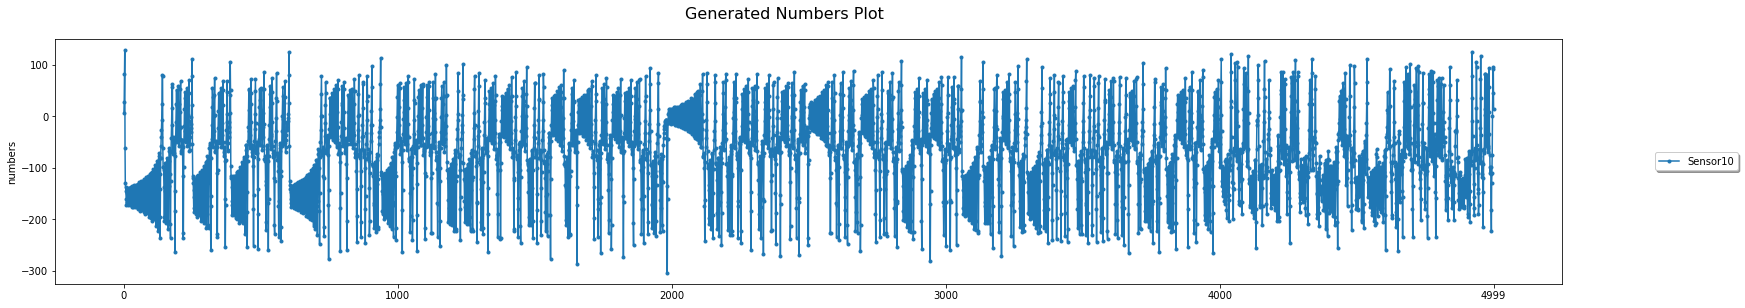

In [5]:
from data_generator import SensorDataGenerator as sdg

dg = sdg()
seed = 20171221
sample_size = 5000

# Expanded Lorenz Attractor
snames = ""
n_features = 10
for i in range(1, n_features+1):
    snames += " Sensor"+str(i)
dg.generation_input.add_option(sensor_names=snames,
                               attractor="lorenz",
                               rho = 28.0,
                               sigma = 10.0,
                               beta = 8.0/3.0,
                               initial = [1.0, 1.0, 1.0],
                               features=n_features,
                               anomaly=0.2)
    
# generation
dg.generate(sample_size, seed=seed)

# plot all Sensors
dg.plot_data()
# plot by Sensor
for i in range(1, n_features+1):
    dg.plot_data(sensors=["Sensor"+str(i)])

For more Lorenz Attractor examples, please refer to Appendix A: Playing With Lorenz Attractor